In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

%matplotlib inline
plt.rcParams['image.cmap'] = 'Paired'
#sns.set(font_scale=2)

In [2]:
# Parent directory for the results of this run
group_results_directory = '/data/jpetrie/MEOPAR/SalishSea/results/remin_param_sweep_new_depth//'
tracer_file = 'SS5x5_1h_20150201_20150501_ptrc_T.nc'
mesh_mask_file = 'mesh_mask.nc'
individual_directories = []
param_vals = []
for file in os.listdir(group_results_directory):
    if file.startswith("nampisrem_zz_remin_D_PON_"):
        val = float(file.split("nampisrem_zz_remin_D_PON_")[1])
        individual_directories.append(file)
        param_vals.append(val)


tracer_datasets = [xr.open_dataset(group_results_directory + '/' + file +'/' + tracer_file) for file in individual_directories]
dataset_dict = dict(zip(param_vals, tracer_datasets))

In [3]:
depths = dataset_dict[param_vals[0]].deptht.values

min_depth_index = np.argmax(depths > 150)
max_depth_index = len(depths)

#for param in param_vals:
t = np.array([float(x) for x in dataset_dict[param_vals[0]].time_centered.values])   
days = (t[:] - t[0])/10**9/3600/24

min_day_index = np.argmax(days > 30)
max_day_index = len(days)

In [4]:
mesh_mask = xr.open_dataset(group_results_directory + individual_directories[0] + '/' + mesh_mask_file)
grid_heights = np.array(mesh_mask['e3t_1d'][0])

In [5]:
NO3_quantity = ((dataset_dict[param_vals[0]].NO3.values)*(grid_heights.reshape((1,40,1,1))))

In [6]:
param_metrics = pd.DataFrame({'PARAM':param_vals})

plot_tracers = ['NO3', 'POC', 'NH4']

for param in param_vals:
    for tracer in plot_tracers:
        tracer_quantity_array = ((dataset_dict[param][tracer].values)*(grid_heights.reshape((1,40,1,1))))
        total_tracer = tracer_quantity_array[min_day_index:max_day_index, min_depth_index:max_depth_index,:,:].sum()
        mean_tracer = total_tracer/sum(grid_heights[min_depth_index:max_depth_index])/(max_day_index - min_day_index)/15
        param_metrics.loc[(param_metrics['PARAM'] == param), "MEAN_"+tracer] = mean_tracer
param_metrics

,PARAM,MEAN_NO3,MEAN_POC,MEAN_NH4
0,3.645254e-07,27.774619,0.338328,1.092818
1,2.300000e-08,27.604593,0.486928,1.056695
2,1.451202e-06,28.038497,0.078631,1.025275
3,2.300000e-07,27.717229,0.404078,1.088427
4,3.645254e-08,27.612870,0.482154,1.059693
5,5.777339e-08,27.625719,0.474482,1.064191
6,1.451202e-07,27.674775,0.440640,1.079094
7,9.156465e-07,27.937223,0.157172,1.064996
8,5.777339e-07,27.847876,0.250091,1.086484
9,9.156465e-08,27.645379,0.461891,1.070633


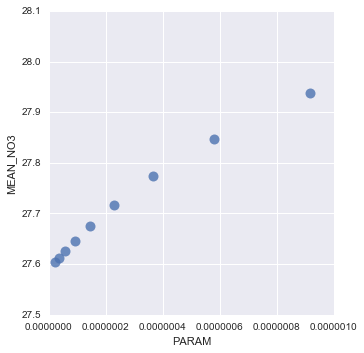

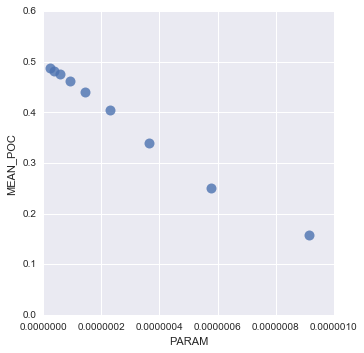

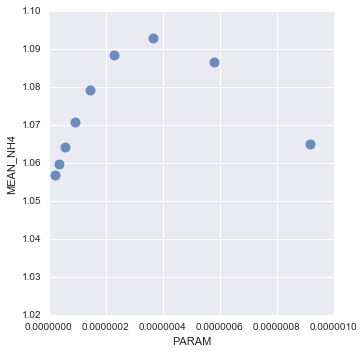

In [7]:
for tracer in plot_tracers:
    p = sns.lmplot('PARAM', 'MEAN_'+tracer,data=param_metrics,fit_reg=False, scatter_kws={"marker": "D",  "s": 100})
    plt.xlim(0,1e-6)

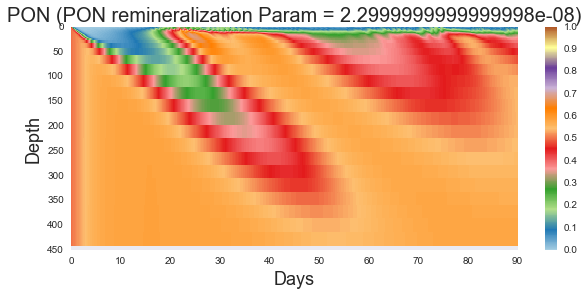

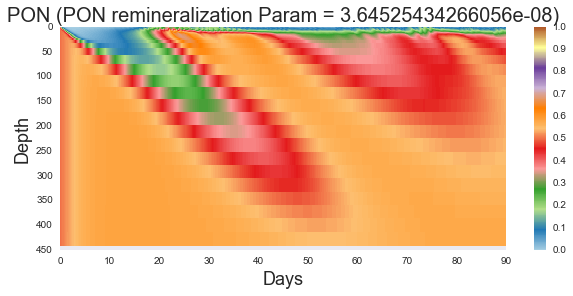

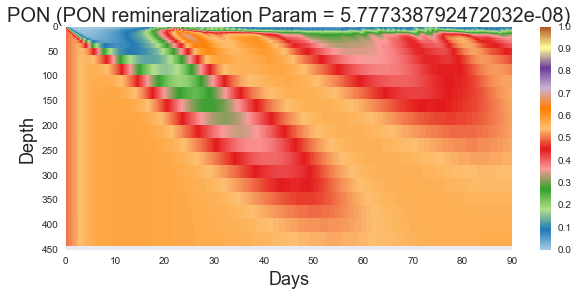

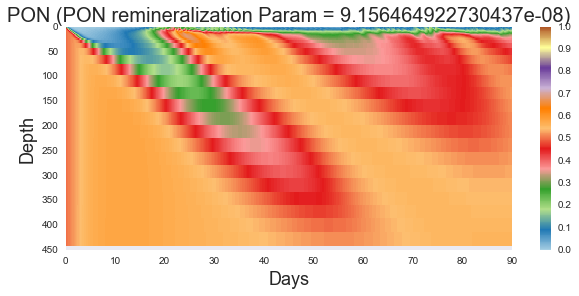

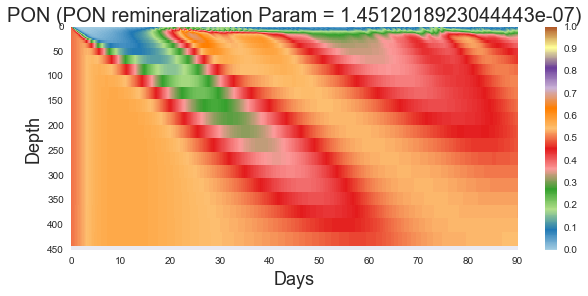

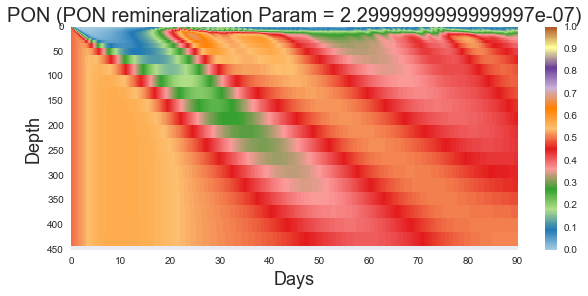

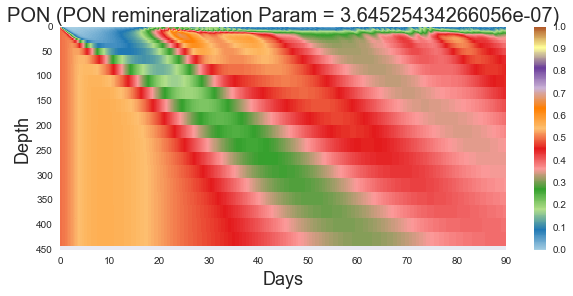

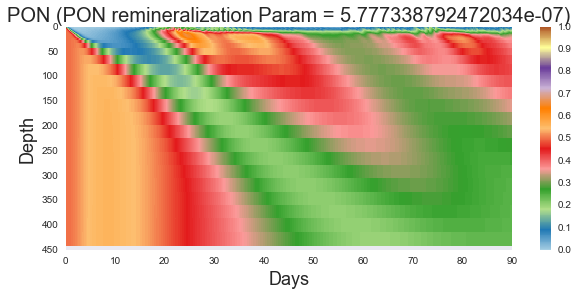

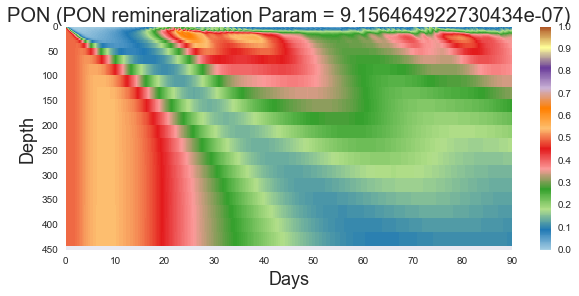

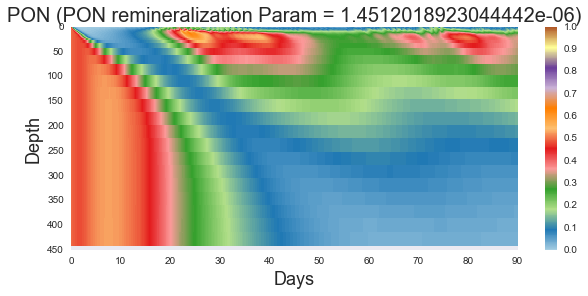

In [24]:
# Plot depth/time/PON heatmap for each value of alpha
keys = (list(dataset_dict.keys()))
keys.sort()

for PON_remin_const in keys:
    z = dataset_dict[PON_remin_const].deptht.values
    t= np.array([float(x) for x in dataset_dict[PON_remin_const].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(10,4))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[PON_remin_const].POC.values[:,:,2,2].T, vmin = 0, vmax = 1)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title("PON (PON remineralization Param = " + str(PON_remin_const)+")", size = 20)
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)

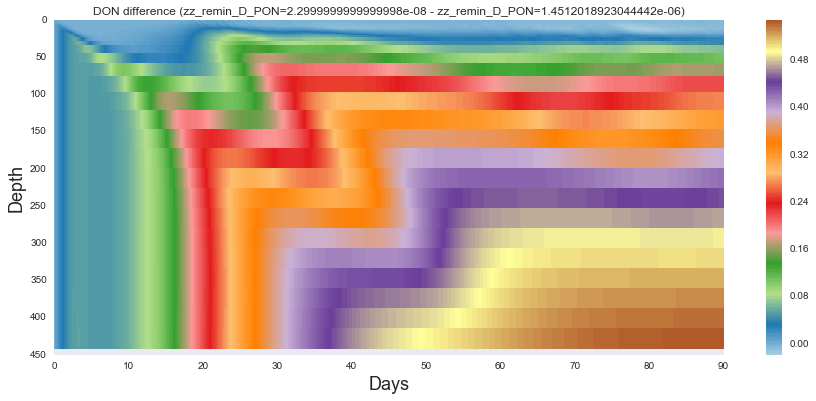

In [25]:
# Plot the difference in PON concentration vs depth and time
fig, ax = plt.subplots(1, 1,figsize=(15,6))
param_1 = min(param_vals)
param_2 = max(param_vals)
mesh=plt.pcolormesh(tz,zt,dataset_dict[param_1].POC.values[:,:,2,2].T - dataset_dict[param_2].POC.values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title("DON difference (zz_remin_D_PON=" + str(param_1) + " - zz_remin_D_PON=" +str(param_2)+ ")")

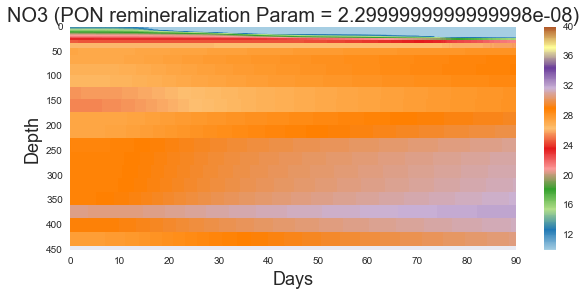

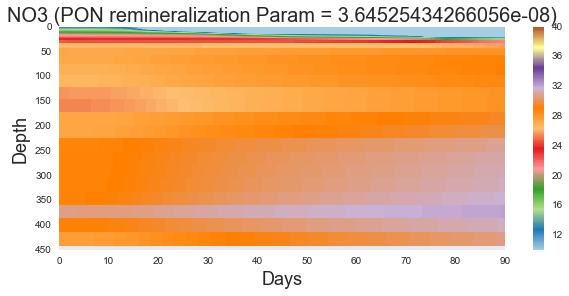

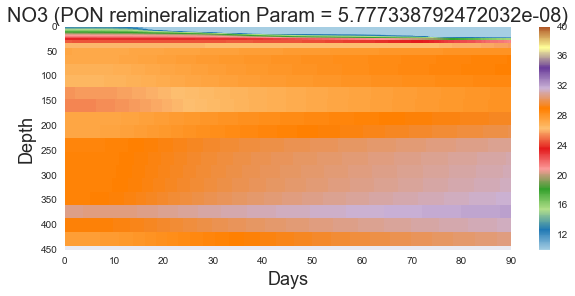

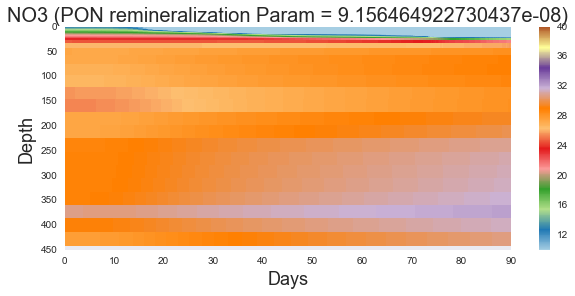

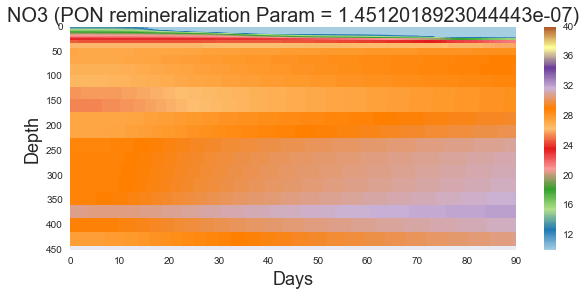

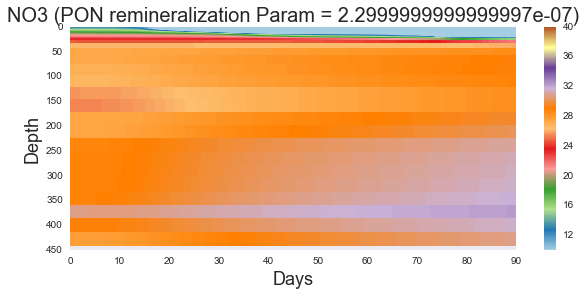

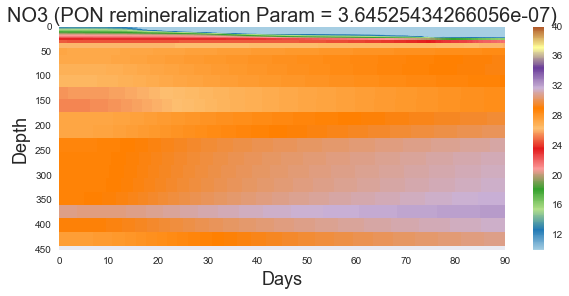

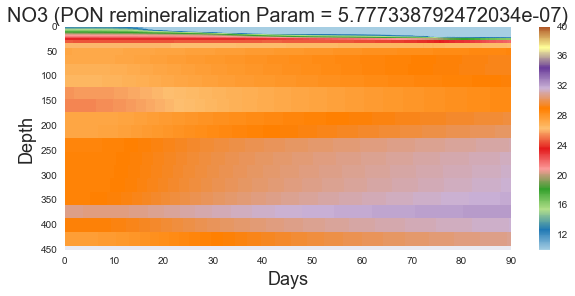

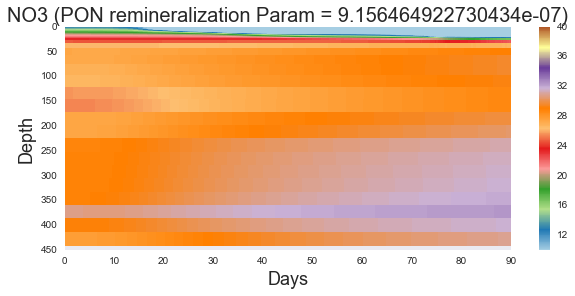

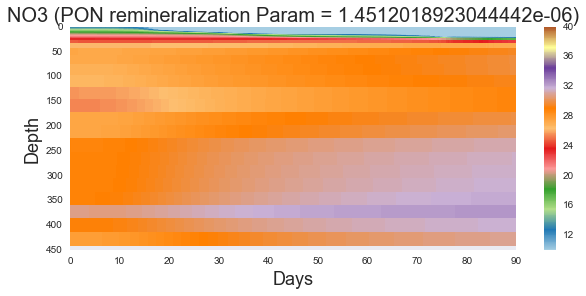

In [26]:
# Plot depth/time/NO3 heatmap for each value
for PON_remin_const in keys:
    z = dataset_dict[PON_remin_const].deptht.values
    t= np.array([float(x) for x in dataset_dict[PON_remin_const].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(10,4))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[PON_remin_const].NO3.values[:,:,2,2].T, vmin = 10, vmax = 40)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title("NO3 (PON remineralization Param = " + str(PON_remin_const)+")", size = 20)
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)

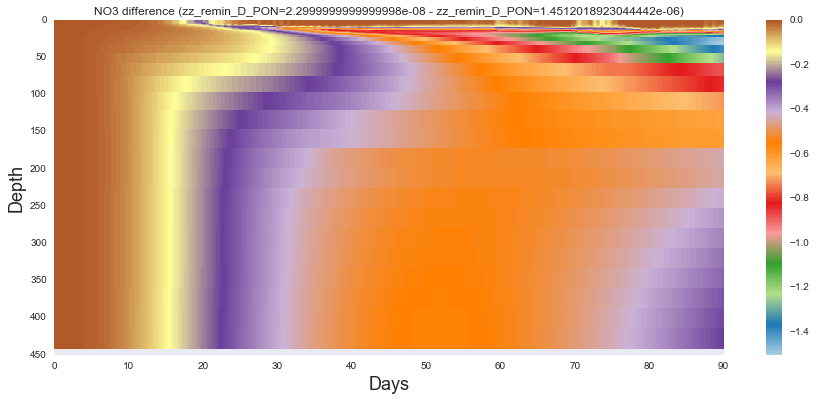

In [27]:
# Plot the difference in NO3 concentration vs depth and time
fig, ax = plt.subplots(1, 1,figsize=(15,6))
param_1 = min(param_vals)
param_2 = max(param_vals)

mesh=plt.pcolormesh(tz,zt,dataset_dict[param_1].NO3.values[:,:,2,2].T - dataset_dict[param_2].NO3.values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title("NO3 difference (zz_remin_D_PON=" + str(param_1) + " - zz_remin_D_PON=" +str(param_2)+ ")")

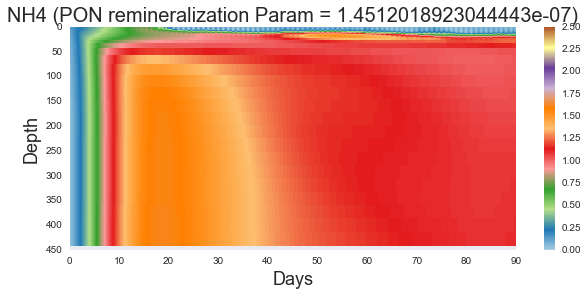

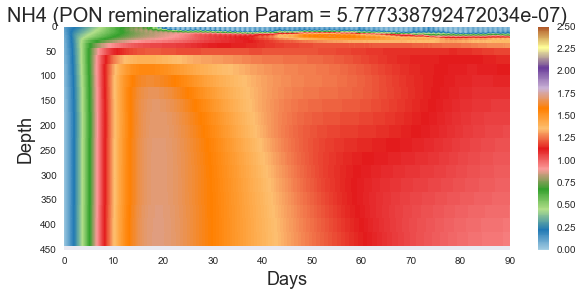

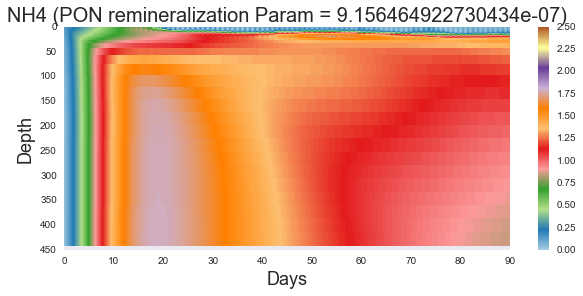

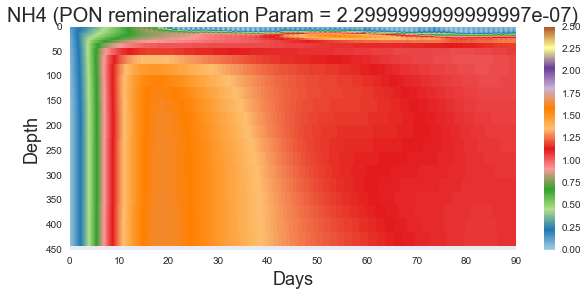

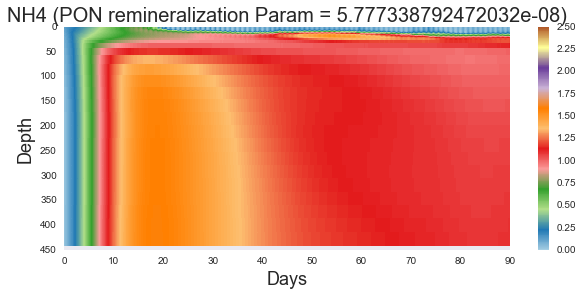

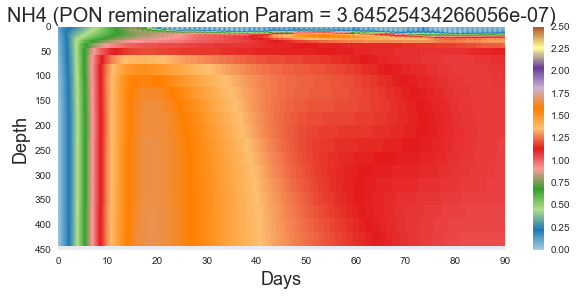

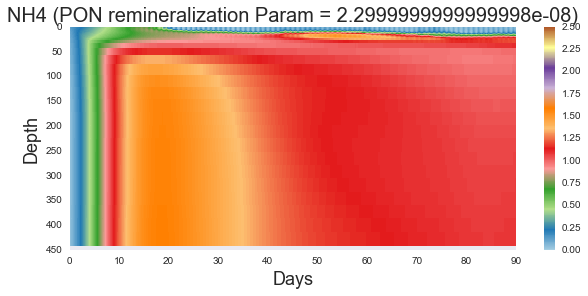

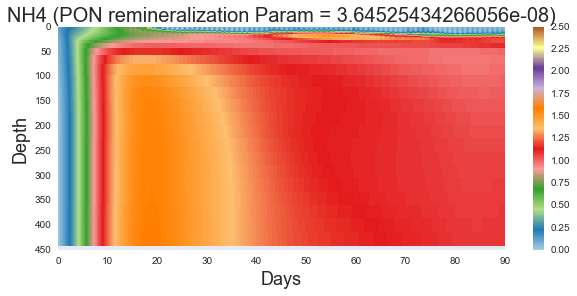

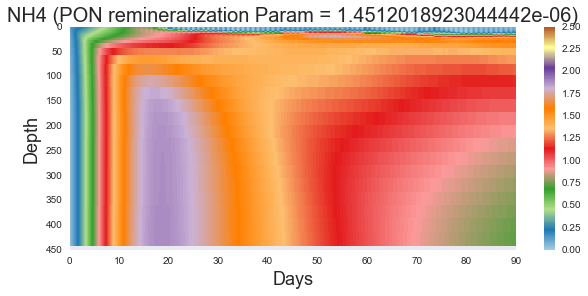

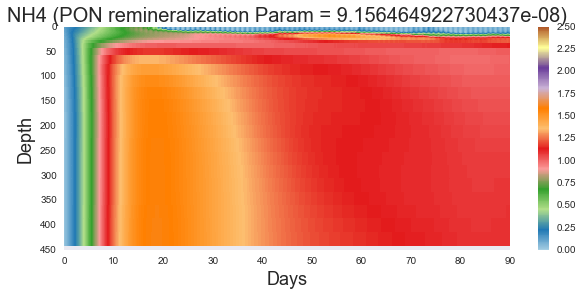

In [28]:
# Plot depth/time/NH4 heatmap for each value
for PON_remin_const in dataset_dict:
    z = dataset_dict[PON_remin_const].deptht.values
    t= np.array([float(x) for x in dataset_dict[PON_remin_const].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(10,4))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[PON_remin_const].NH4.values[:,:,2,2].T, vmin = 0, vmax = 2.5)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title("NH4 (PON remineralization Param = " + str(PON_remin_const)+")", size = 20)
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)

In [29]:
param_vals

[3.64525434266056e-07,
 2.2999999999999998e-08,
 1.4512018923044442e-06,
 2.2999999999999997e-07,
 3.64525434266056e-08,
 5.777338792472032e-08,
 1.4512018923044443e-07,
 9.156464922730434e-07,
 5.777338792472034e-07,
 9.156464922730437e-08]

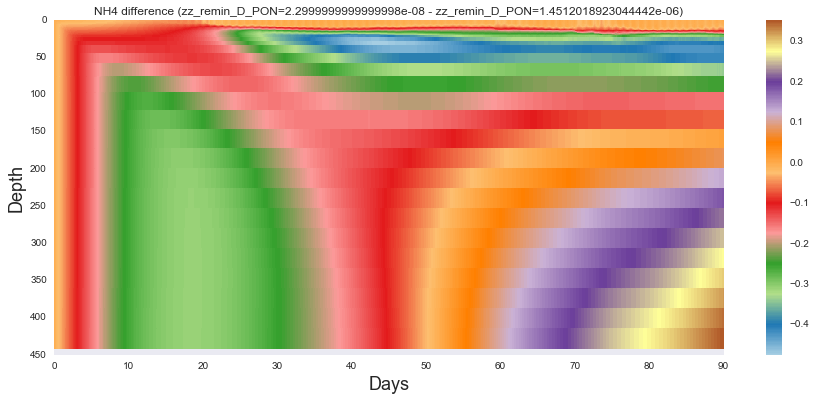

In [31]:
# Plot the difference in NH4 concentration vs depth and time
fig, ax = plt.subplots(1, 1,figsize=(15,6))
param_1 = min(param_vals)
param_2 = max(param_vals)

mesh=plt.pcolormesh(tz,zt,dataset_dict[param_1].NH4.values[:,:,2,2].T - dataset_dict[param_2].NH4.values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title("NH4 difference (zz_remin_D_PON=" + str(param_1) + " - zz_remin_D_PON=" +str(param_2)+ ")")

In [16]:
# Convert list of xarrays to a single pandas dataframe. Easier to manipulate and plot
dataframe_list = []
for PON_remin_const in dataset_dict:
    df = dataset_dict[PON_remin_const].to_dataframe().query('x == 2 and y == 2 and axis_nbounds == 0')
    df['PON_CONST'] = PON_remin_const
    dataframe_list.append(df)

df_subset = pd.concat(dataframe_list)

 # Subset for certain grids of the 5x5
df_subset.reset_index(inplace=True) # Get rid of that multiindex madness

In [18]:
# Create a dataframe with depth averaged tracer values. If all grid heights are the same this is the mean value
mesh_mask = xr.open_dataset(group_results_directory + '/' + individual_directories[0] +'/' + 'mesh_mask.nc')

grid_heights = pd.DataFrame({'deptht': mesh_mask['gdept_1d'].values[0], 'GRID_HEIGHT' : mesh_mask['e3t_1d'].values[0]})


grid_heights = grid_heights.round({'deptht':3})
df_subset = df_subset.round({'deptht':3})

df_subset = pd.merge(df_subset, grid_heights, on='deptht', how = "left")

In [20]:
plot_vars = [ 'DOC','MICZ', 'MYRI', 'NH4', 'NO3', 'O2', 'PHY', 'PHY2', 'POC', 'Si', 'bSi']


grouped = df_subset.groupby(['time_counter','PON_CONST','x','y'])

def weighted(x, cols, w="deptht"):
             return pd.Series(np.average(x[cols], weights=x[w], axis=0), cols)

depth_summed = grouped.apply(weighted, plot_vars)
depth_summed.reset_index(inplace=True)


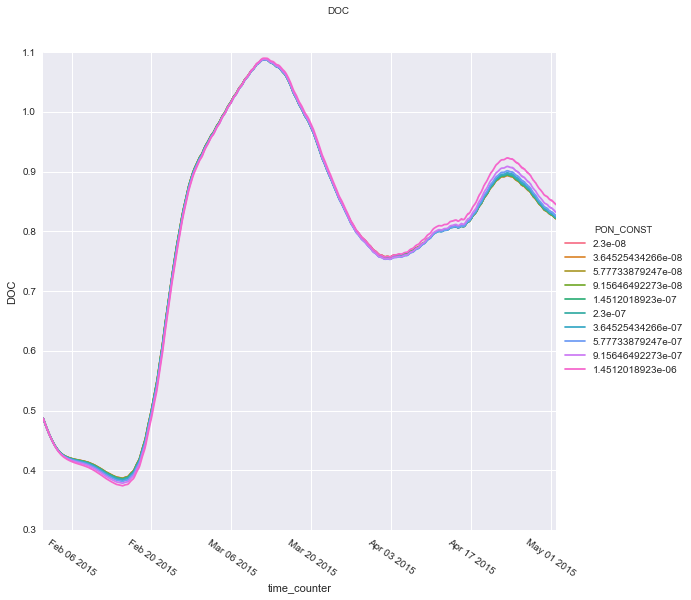

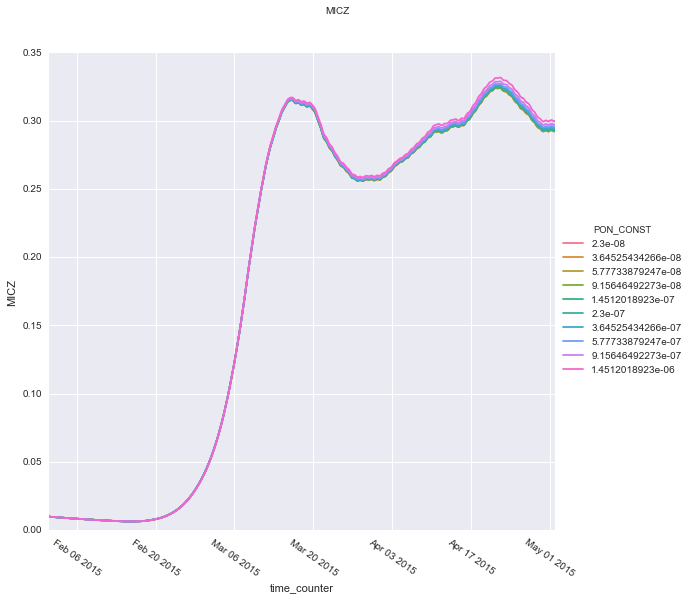

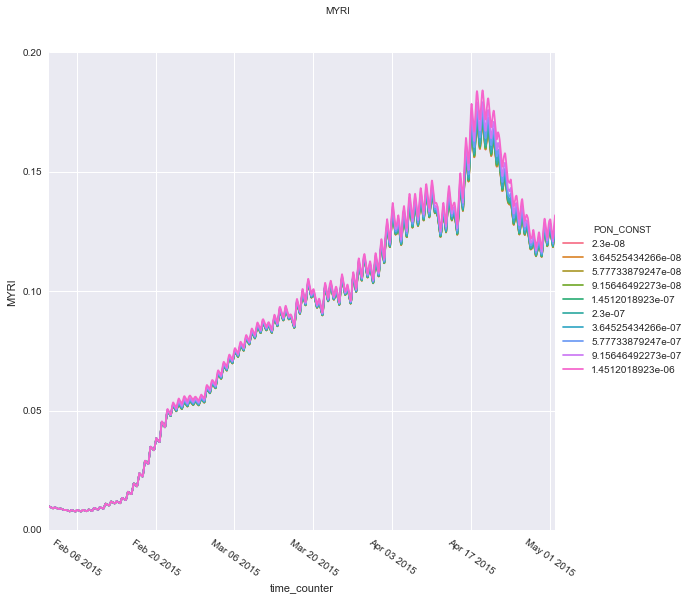

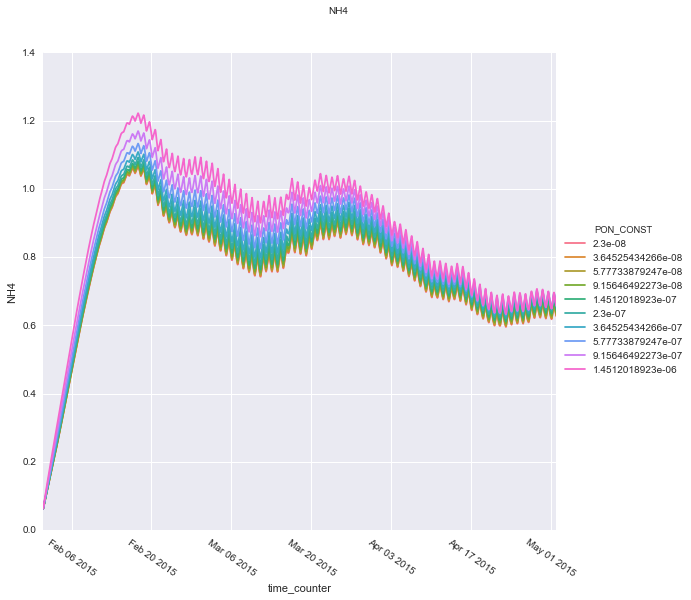

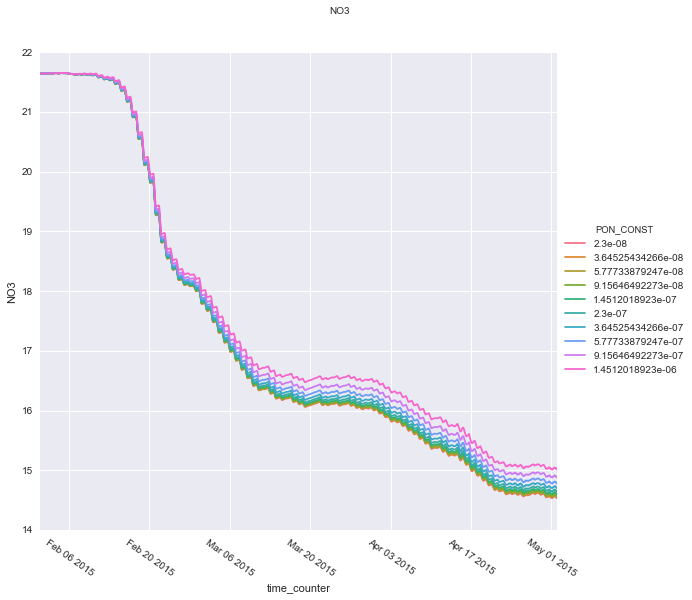

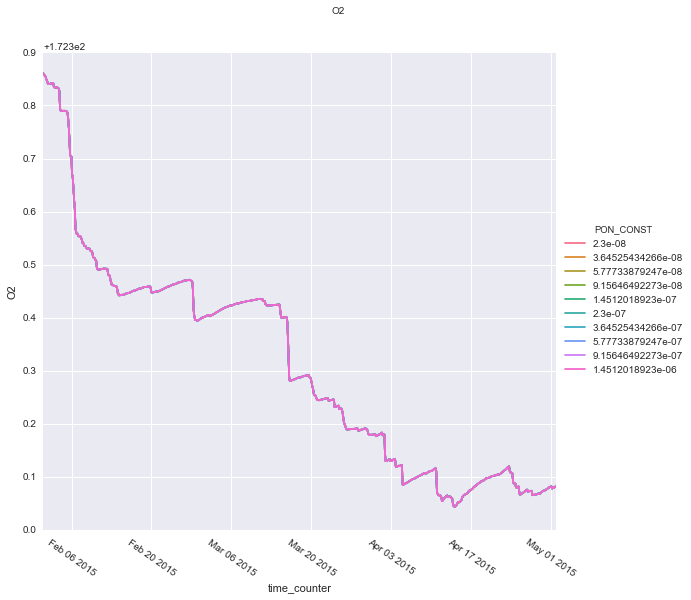

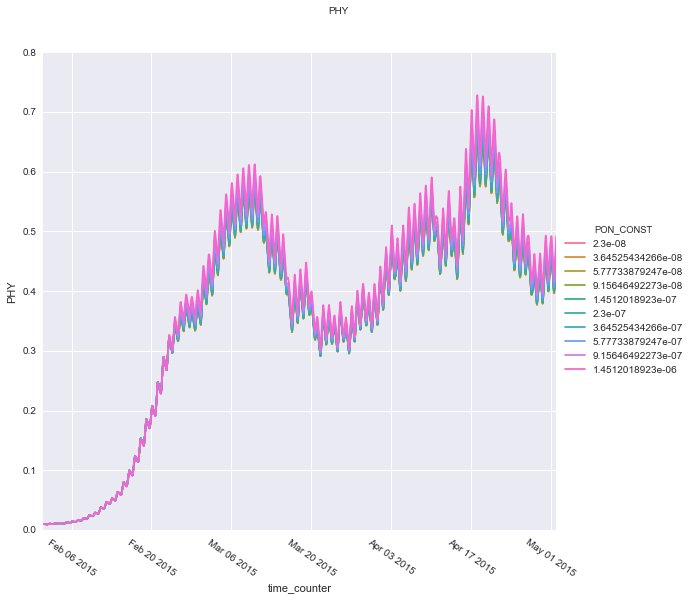

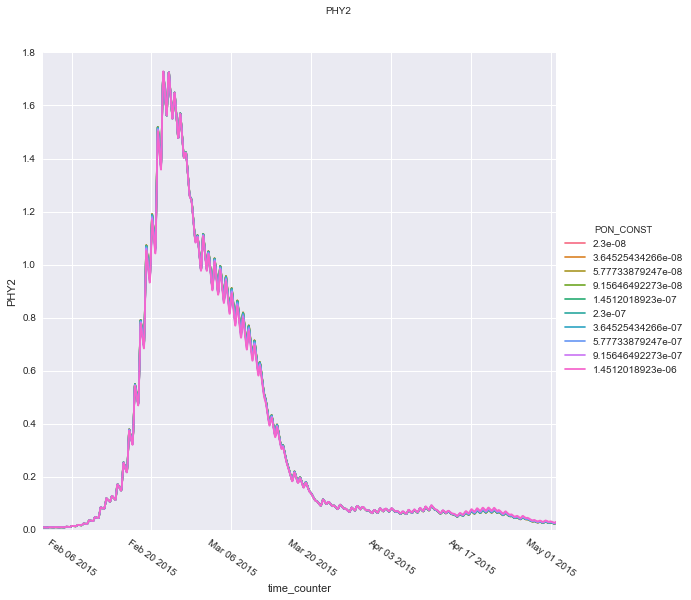

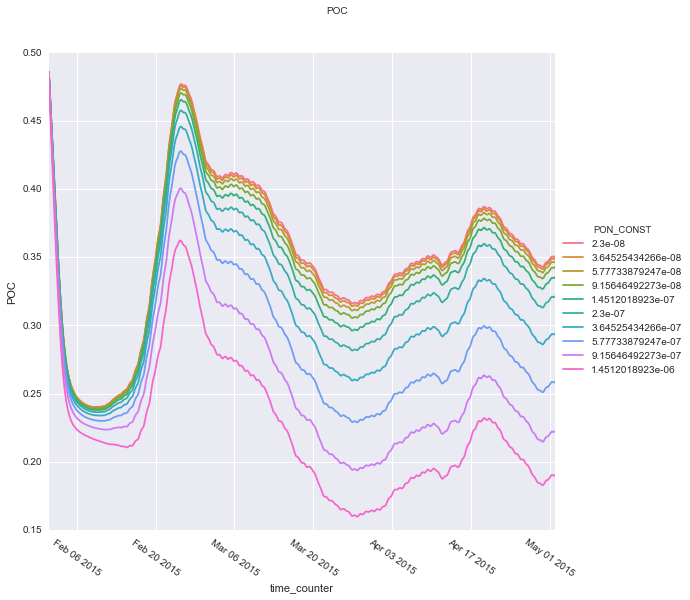

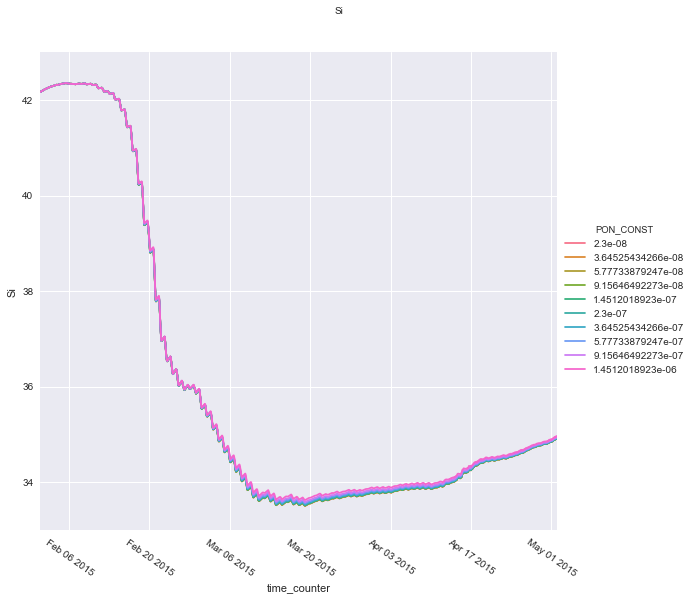

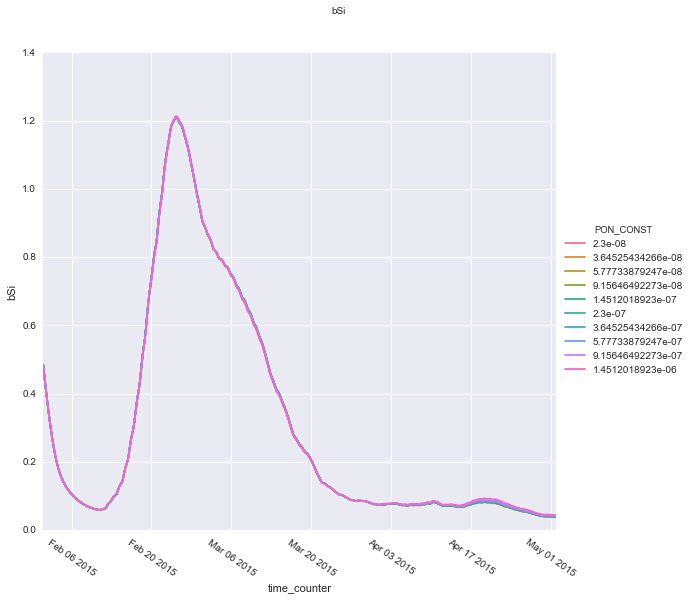

In [21]:
for var in plot_vars:
    fg = sns.FacetGrid(data=depth_averaged, hue='PON_CONST',size =8)
    fg.map(plt.plot, 'time_counter', var).add_legend()
    fg.set_xticklabels(rotation=-35)
    plt.subplots_adjust(top=0.9)
    fg.fig.suptitle(var)

[   0.5      5.5     10.505   15.634   24.1     76.586  199.573  333.75 ]


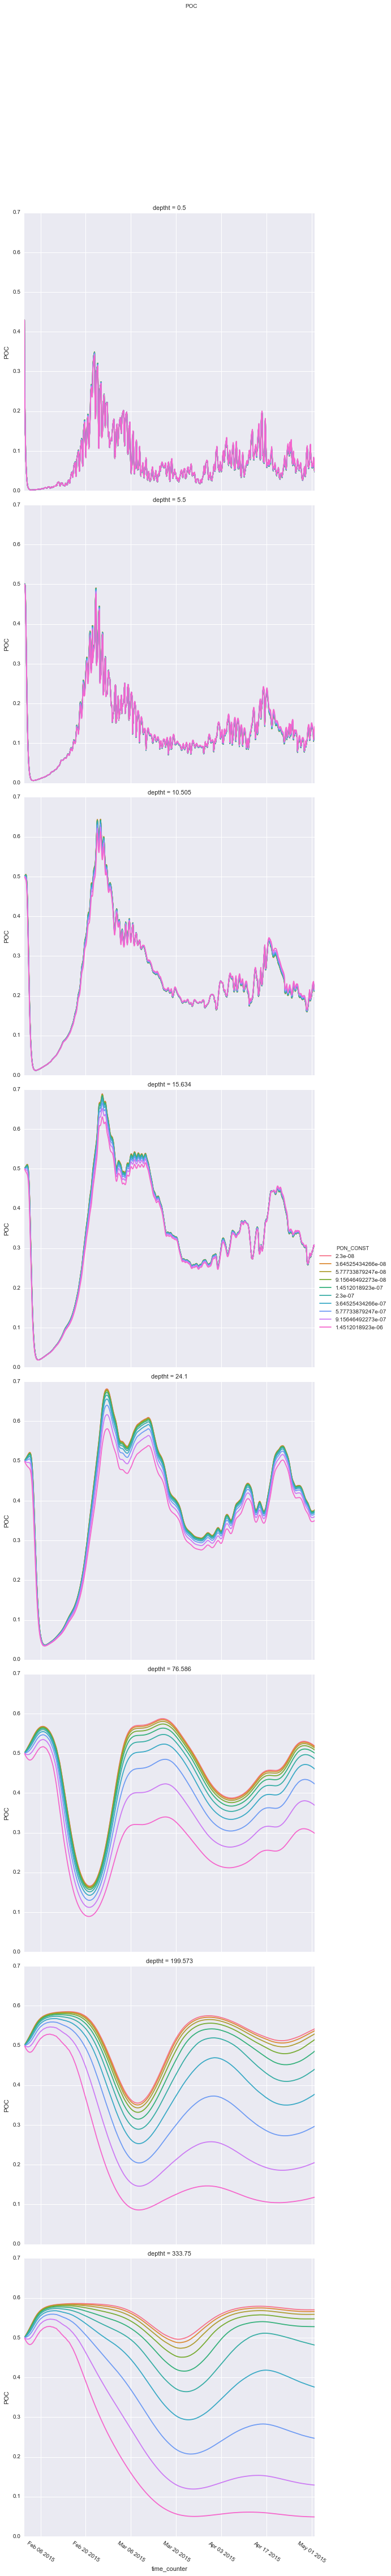

In [22]:
plot_vars = ['POC']#[ 'DOC','MICZ', 'MYRI', 'NH4', 'NO3', 'O2', 'PHY', 'PHY2', 'POC', 'Si', 'bSi']



depth_vals = (df_subset['deptht'].unique())[0:40:5]

print(depth_vals)
for var in plot_vars:
    fg = sns.FacetGrid(data=df_subset.query("deptht in @depth_vals"), hue='PON_CONST',row = "deptht",size =8)
    fg.map(plt.plot, 'time_counter', var).add_legend()
    fg.set_xticklabels(rotation=-35)
    plt.subplots_adjust(top=0.9)
    fg.fig.suptitle(var)